# Model : Classification Model using Titanic Data

### Build XGBoost Model to Predict the Survival of a Titanic Passenger

Knowing all attributes of a passenger, can we predict whether the passenger will survive?

## Overview

####  Part 1: Build XGBoost Classification Model

Read the cleaned Titanic dataset

Split data into train, validation, test 

Build classification model using SKLearn API and using default parameters

Model performance on validation data 

Model performance on test data

Plot performance metrics


#### Part 2: Perform Cross Validation

#### Part 3: Perform Probability Calibration 

## Special Note

We use scikit-learn API

The sklean algorithms use the following convention about the class labels of the data:

Negative Class : 0

Positive Class : 1

-------------

## Load Python Modules

In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

In [4]:
import xgboost as xgb

-----------------

## Part 1 : Build XGBoost Model

### 1.1 : Read Data

Import Jupyter Notebook in the the current environment that does the Data Processing  

In [5]:
"""Import Jupyter Notebook"""

import import_ipynb
import bootcamp_data_processing as bdp

importing Jupyter notebook from bootcamp_data_processing.ipynb
Help on method sample in module pandas.core.generic:

sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None) -> 'FrameOrSeries' method of pandas.core.frame.DataFrame instance
    Return a random sample of items from an axis of object.
    
    You can use `random_state` for reproducibility.
    
    Parameters
    ----------
    n : int, optional
        Number of items from axis to return. Cannot be used with `frac`.
        Default = 1 if `frac` = None.
    frac : float, optional
        Fraction of axis items to return. Cannot be used with `n`.
    replace : bool, default False
        Allow or disallow sampling of the same row more than once.
    weights : str or ndarray-like, optional
        Default 'None' results in equal probability weighting.
        If passed a Series, will align with target object on index. Index
        values in weights not found in sampled object will be ignored a

Get the processed data

In [6]:
train_df, test_df = bdp.train_test_ordinal
# train_df, test_df = ds.train_test_onehot

Ignore this cell for the first run. We will come back to this cell later on

In [7]:
# train_df.drop(columns=['Boat'], inplace=True)
# test_df.drop(columns=['Boat'], inplace=True)

Create X and y to be used as model inputs

In [8]:
X = train_df.drop('Survived', axis=1)
y = train_df.Survived

### 1.2 : Split Data

Split training dataset in to train and valid datasets

In [9]:
"""Setting the Seed"""
theSeed = 42

In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.90, random_state=theSeed)
print(f'train data: {X_train.shape}')
print(f'valid data: {X_valid.shape}')

train data: (883, 16)
valid data: (99, 16)


Format test dataset

In [11]:
X_test = test_df.drop('Survived', axis=1)
y_test = test_df.Survived
print(f'test data : {X_test.shape}')

test data : (327, 16)


### 1.3 : Scale the Data

In [12]:
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

scalar  = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_valid = scalar.fit_transform(X_valid)
X_test  = scalar.fit_transform(X_test)

### 1.4 : Train Model

#### 1.4.1 : Setting Weight to the Data

In [13]:
# scale_pos_weight = np.random.rand(X_train.shape[0], )

#### 1.4.2 : XGB Model

XGB Parameter List: https://xgboost.readthedocs.io/en/stable/parameter.html

#### 1.4.3 : Define model

In [14]:
# param_grid = {
#     'objective': 'binary',
#     'booster': 'gbtree', 
#     'tree_method': 'auto',
#     'eval_metric' : ['auc','logloss','aucpr'],
#     'n_jobs': 2,
#     'n_estimators': 100,
#     'max_depth': 5,
#     'learning_rate': 0.1,
#     'gamma': 1.0,
#     'min_child_weight': 0.001, 
#     'max_delta_step': 0.0,
#     'subsample': 1.0, 
#     'colsample_bytree': 1.0, 
#     'colsample_bylevel': 1.0,
#     'colsample_bynode': 1.0,
#     'reg_alpha': 0.0, 
#     'reg_lambda': 0.0,
#     'scale_pos_weight': 1.0,
#     'random_state': None,
#     'verbose': False}

# model = xgb.XGBClassifier()
# model.set_params( **param_grid )

In [15]:
model = xgb.XGBClassifier(
    objective='binary:logistic',
    booster='gbtree', 
    tree_method='auto',
    eval_metric=['auc','logloss','aucpr'],
    n_jobs=2,
    n_estimators=100,
    max_depth=5, 
    learning_rate=0.1, 
    gamma=0,
    min_child_weight=0.001, 
    max_delta_step=0.0,
    subsample=1.0, 
    colsample_bytree=1.0, 
    colsample_bylevel=1.0,
    colsample_bynode=1.0,
    reg_alpha=0.0, 
    reg_lambda=0.0,
    scale_pos_weight=1.0,
    #verbose=0,
    random_state=None)

#### 1.4.4 : Fit model

In [16]:
fit = model.fit(
    X_train, y_train,
    sample_weight=None, 
    base_margin=None,
    eval_set=[(X_valid, y_valid)],  
    #eval_metric=['auc','logloss','aucpr'], 
    early_stopping_rounds=None, 
    verbose=False, 
    xgb_model=None, 
    sample_weight_eval_set=None, 
    #base_margin_eval_set=None, 
    feature_weights=None, 
    callbacks=None)

In [17]:
# model.get_params()

### 1.5 : Model Performance on Validation Dataset

In [18]:
"""AUC"""
auc = list(model.evals_result_.values())[0]['auc']
auc = np.array(auc)
print(f"Mean AUC : { round(auc.mean(),4)}")

Mean AUC : 0.9905


In [19]:
"""LOSS"""
loss = list(model.evals_result_.values())[0]['logloss']
loss = np.array(loss)
print(f"Mean Loss : { round(loss.mean(),4) }")

Mean Loss : 0.1445


In [20]:
"""AUC PR"""
aucpr = list(model.evals_result_.values())[0]['aucpr']
aucpr = np.array(aucpr)
print(f"Mean Loss : { round(aucpr.mean(),4) }")

Mean Loss : 0.9802


#### 1.5.1 : Plot model performance on validation data 

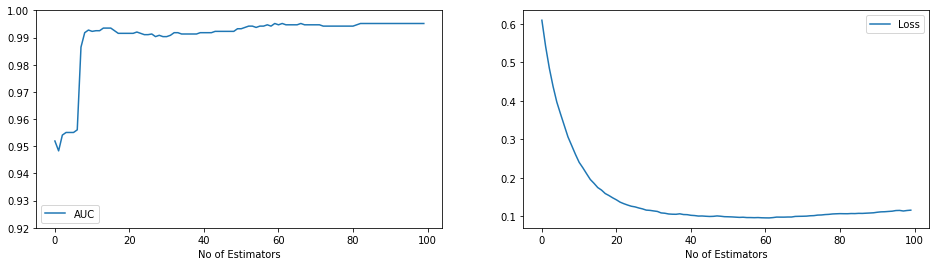

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
ax[0].plot(auc, label='AUC')
ax[0].set_xlabel('No of Estimators')
ax[0].set_ylim(0.92,1.0)

ax[1].plot(loss,label='Loss')
ax[1].set_xlabel('No of Estimators')

ax[0].legend()
ax[1].legend()
plt.show()

### 1.6 : Model Performance on Test Data

In [22]:
y_pred = model.predict(
    X_test, 
    output_margin=False, 
    ntree_limit=None, 
    validate_features=True, 
    base_margin=None)

In [23]:
y_score = model.predict_proba(
    X_test, 
    ntree_limit=None, 
    validate_features=True, 
    base_margin=None)

#### 1.6.1 : Performance Metrics

In [24]:
from sklearn import metrics

In [25]:
"""Accuracy Score"""
accuracy = metrics.accuracy_score(y_test, y_pred, sample_weight=None, normalize=True)
print( round(accuracy, 4))

0.9847


In [26]:
"""Balanced Accuracy Score"""
balanced_accuracy = metrics.balanced_accuracy_score(
    y_test, y_pred, 
    sample_weight=None, 
    adjusted=False
)

print( round(balanced_accuracy, 4))

0.9841


In [27]:
"""ROC Curve"""
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score[:,1])

In [28]:
"""AUC"""
auc = metrics.auc(fpr, tpr)
print( round(auc, 4))

0.9982


In [29]:
"""Confusion Matrix"""
metrics.confusion_matrix(y_test, y_pred)

array([[182,   2],
       [  3, 140]], dtype=int64)

In [30]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
print(f"TN:{tn}, FP:{fp}, FN:{fn}, TP:{tp}")

TN:182, FP:2, FN:3, TP:140


In [31]:
"""F1 Score"""
f1 = metrics.f1_score(
    y_test, y_pred, 
    labels=None, 
    pos_label=1, 
    average='binary', 
    sample_weight=None
)

print( round(f1, 4))

0.9825


In [32]:
"""Log Loss"""
metrics.log_loss(
    y_test, y_score[:, 1], 
    normalize=True, 
    sample_weight=None, 
    labels=[0,1]
)

0.05467647906182188

In [33]:
"""Precision, Recall, Fscore, Support"""
metrics.precision_recall_fscore_support(
    y_test, y_pred, 
    labels=[0,1], 
    pos_label=1, 
    average=None, 
    sample_weight=None
)

(array([0.98378378, 0.98591549]),
 array([0.98913043, 0.97902098]),
 array([0.98644986, 0.98245614]),
 array([184, 143], dtype=int64))

In [34]:
precision = metrics.precision_score(
    y_test, y_pred, 
    labels=[0,1], 
    pos_label=1, 
    average='binary', 
    sample_weight=None
)

print( round(precision, 4))

0.9859


In [35]:
recall = metrics.recall_score(
    y_test, y_pred, labels=[0,1], pos_label=1, 
    average='binary', 
    sample_weight=None
)

print( round(recall, 4))

0.979


#### 1.6.2 : Plots of Performance Metrics

Confusion Metrix

AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_estimator'

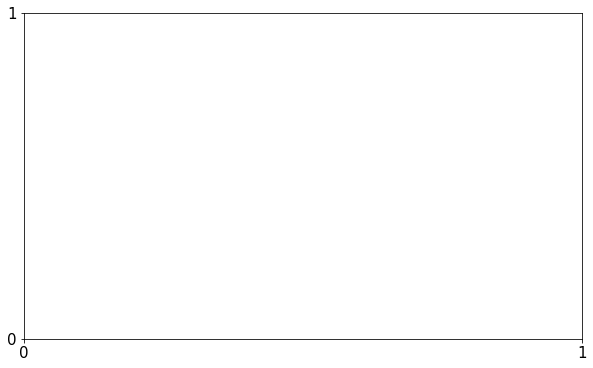

In [36]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_xlabel("", fontdict={'size':15})
ax.set_ylabel("", fontdict={'size':15})

ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(['0','1'], fontdict={'size':15})
ax.set_yticklabels(['0','1'], fontdict={'size':15})


metrics.ConfusionMatrixDisplay.from_estimator(
    model, X_test, y_test, 
    labels=None, sample_weight=None, normalize=None, 
    display_labels=[0,1], 
    cmap='OrRd', 
    ax=ax)

ROC Curve

AttributeError: type object 'RocCurveDisplay' has no attribute 'from_estimator'

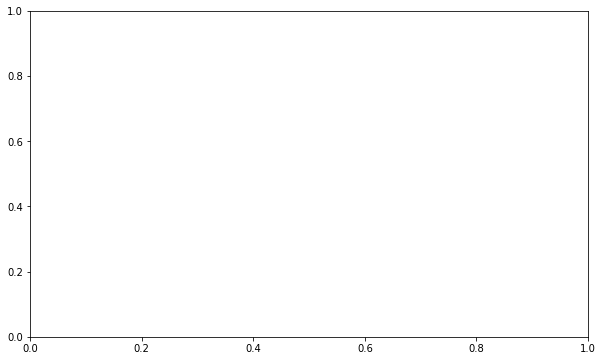

In [37]:
fig, ax = plt.subplots(figsize=(10,6))
metrics.RocCurveDisplay.from_estimator(model, X_test, y_test, sample_weight=None, ax=ax)

AttributeError: type object 'PrecisionRecallDisplay' has no attribute 'from_estimator'

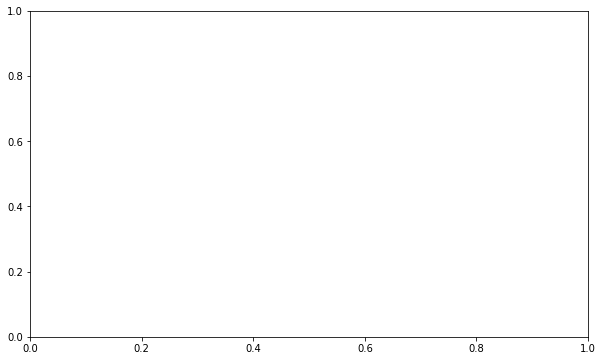

In [38]:
fig, ax = plt.subplots(figsize=(10,6))
metrics.PrecisionRecallDisplay.from_estimator(model, X_test, y_test, sample_weight=None, ax=ax)

Feature Importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

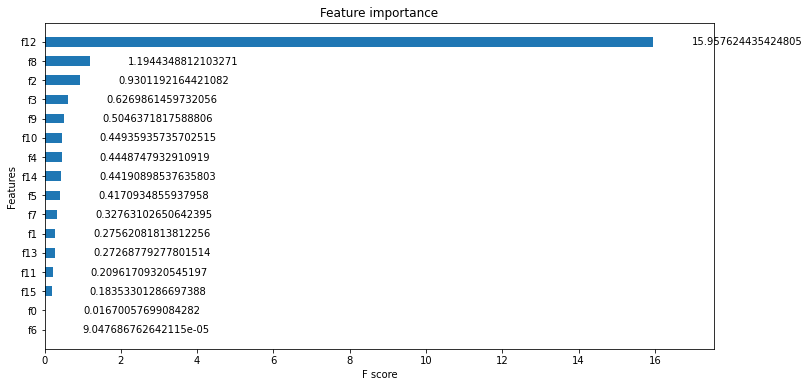

In [39]:
fig, ax = plt.subplots(figsize=(12,6))
xgb.plot_importance(fit, height=0.5, importance_type='gain', grid=False, ax=ax)

Plot the decision Trees

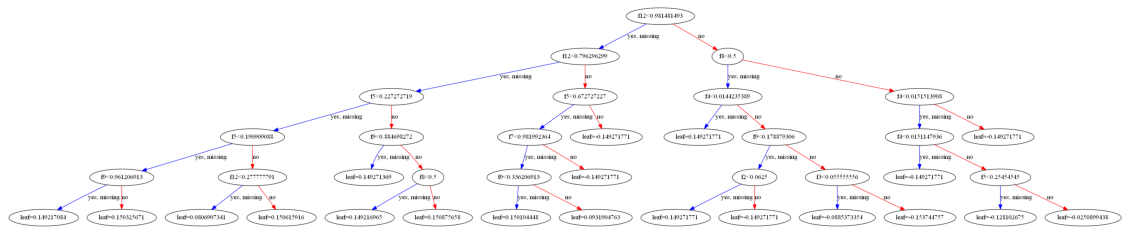

In [40]:
fig, ax = plt.subplots(figsize=(20,20))
xgb.plot_tree(fit, num_trees=4, rankdir='TB', ax=ax)
plt.show()

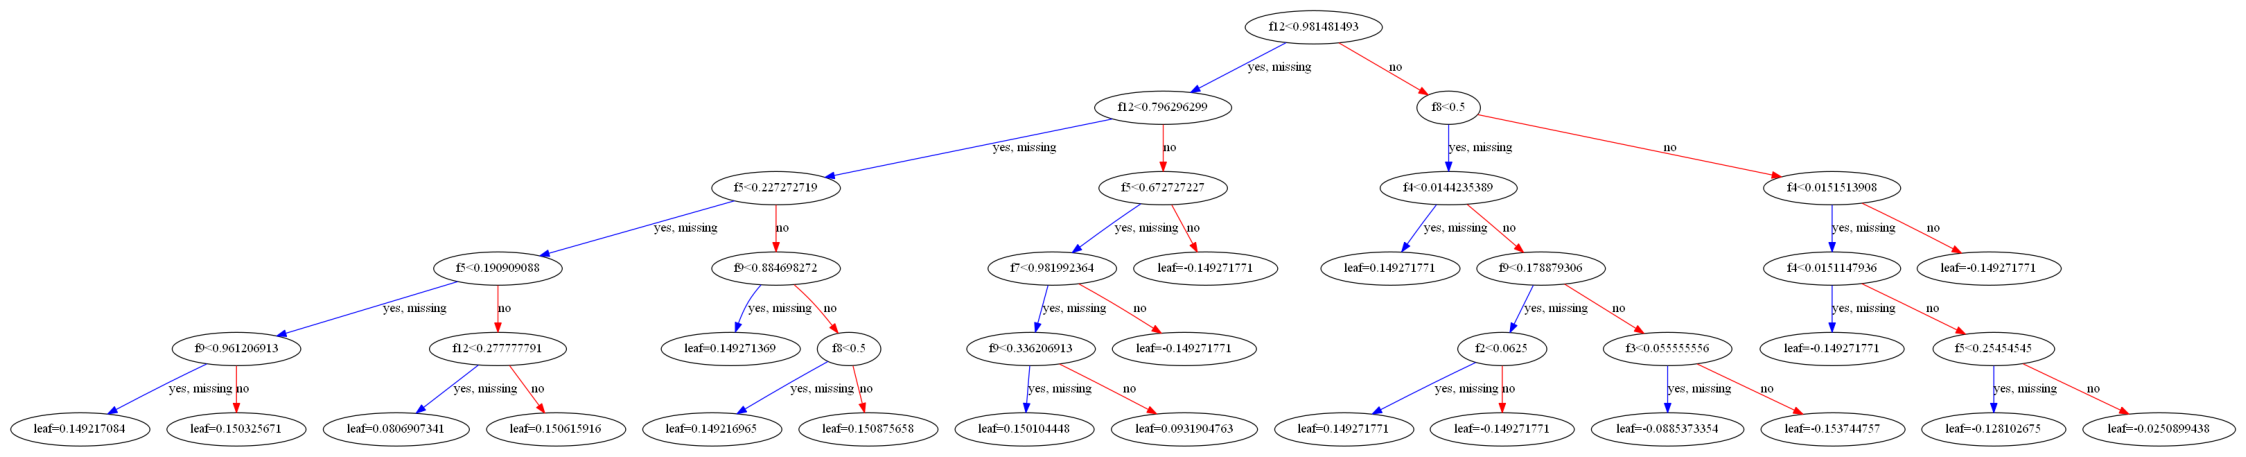

In [41]:
xgb.plot_tree(fit, num_trees=4, rankdir='TB')
fig = plt.gcf()
fig.set_size_inches(40,20)
plt.show()

-------------------

## Part 2 : Perfom Cross-Validation 

Cross-Validation can be implement in two different ways. We will explore both of these methods.

To implement CV, the data is not needed to be divided manually into 'train' and 'valid'.

### 2.1 : Scale the Data

In [42]:
X_train = train_df.drop('Survived', axis=1)
y_train = train_df.Survived
X_test  = test_df.drop('Survived', axis=1)
y_test  = test_df.Survived

from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

scalar = MinMaxScaler()
X_train_scale = scalar.fit_transform(X_train)
X_test_scale = scalar.fit_transform(X_test)

### 2.2 :  Model with Default Parameters

In [43]:
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate

In [44]:
model_cv = xgb.XGBClassifier(
    use_label_encoder=False,
    n_estimators=100,
    max_depth=5, 
    learning_rate=0.1, 
    objective='binary:logistic',
    booster='gbtree', 
    tree_method='auto',
    n_jobs=2,
    gamma=0,
    min_child_weight=0.001, 
    max_delta_step=0.0,
    subsample=1.0, 
    colsample_bytree=1.0, 
    colsample_bylevel=1.0,
    colsample_bynode=1.0,
    reg_alpha=0.0, 
    reg_lambda=0.0,
    scale_pos_weight=1.0,
    #verbose=0,
    random_state=None)

#### Predict Classes

In [45]:
y_pred_cv = cross_val_predict(
    model_cv, 
    X_train_scale, y_train, 
    cv=5,    
    n_jobs=2, 
    verbose=0,
    method='predict'
)

#### Predict Probabilities

In [46]:
y_score_cv = cross_val_predict(
    model_cv, 
    X_train_scale, y_train, 
    cv=5, 
    n_jobs=2, 
    verbose=0,
    method='predict_proba'
)

Validation Scores

In [47]:
score_cv = cross_val_score(model_cv, X_train, y_train, scoring='accuracy', cv=5)
score_cv

array([0.97461929, 0.95939086, 0.95918367, 0.96428571, 0.96938776])

In [48]:
score_cv = cross_validate(model_cv, X_train, y_train, scoring=['accuracy','roc_auc','f1'], cv=5)
score_cv

{'fit_time': array([0.1698935 , 0.16090012, 0.19288015, 0.17189145, 0.17788839]),
 'score_time': array([0.01599145, 0.01699066, 0.01698852, 0.01599026, 0.02098799]),
 'test_accuracy': array([0.97461929, 0.95939086, 0.95918367, 0.96428571, 0.96938776]),
 'test_roc_auc': array([0.99388889, 0.96988889, 0.99256338, 0.98771831, 0.9896338 ]),
 'test_f1': array([0.96598639, 0.94202899, 0.94444444, 0.94964029, 0.95652174])}

Show the number of Miss-classifications 

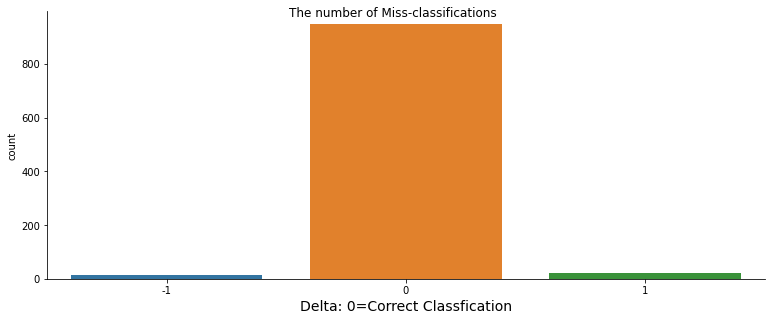

In [49]:
y_diff = y_train.to_numpy() - y_pred_cv
diff = pd.DataFrame(y_diff, columns=['Delta'], dtype=object)

# b,c = np.unique(y_diff, return_counts=True)
# print( list(zip(b,c)) )


# Method 1
# fig, ax = plt.subplots( figsize=(10,5) )
# tmp = diff.groupby(['Delta'], as_index=False).size()
# sns.barplot(x='Delta', y='size', hue='Delta', data=tmp, orient='v')


# Method 2
g = sns.catplot(
    x='Delta', kind='count',
    data=diff,
    height=4.25, 
    aspect=2.5,
    legend=True,
    #palette='Reds'
)

g.fig.suptitle('The number of Miss-classifications')
g.set_xlabels('Delta: 0=Correct Classfication', fontdict={'size':14}) 


plt.show()


#### The Distribution of Predicted Probabilities

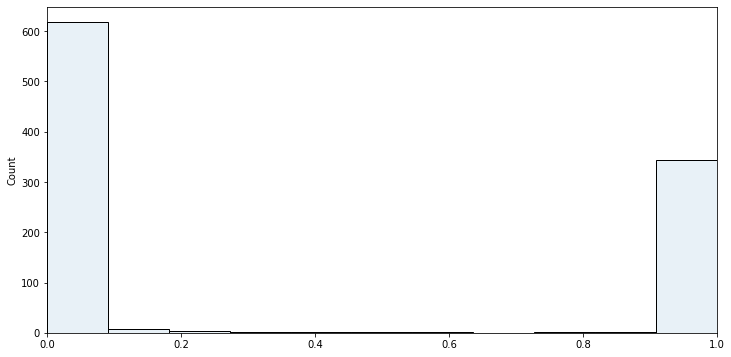

In [50]:
fig, ax = plt.subplots( figsize=(12,6) )

#sns.histplot(y_score_cv[:,0], alpha=1.0, palette='Reds', stat="count")
sns.histplot(y_score_cv[:,1], alpha=0.1, palette='Blues',stat="count")

ax.set_xlim(0.00, 1.00)

plt.show()

-------------------

## Part 3 : Perform Probability Calibration

https://scikit-learn.org/stable/modules/calibration.html#calibration

In [51]:
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

ImportError: cannot import name 'CalibrationDisplay' from 'sklearn.calibration' (C:\Users\Pappu\anaconda3\lib\site-packages\sklearn\calibration.py)

In [ ]:
y_score = model.predict_proba(
    X_train, 
    ntree_limit=None, 
    validate_features=True, 
    base_margin=None)

In [ ]:
model_iso = CalibratedClassifierCV(
    base_estimator=model, 
    method='isotonic', 
    cv=5
)

fit_iso = model_iso.fit(X_train_scale, y_train)


y_pred_iso  = model_iso.predict(X_train_scale)
y_score_iso = model_iso.predict_proba(X_train_scale)

In [ ]:
model_sig = CalibratedClassifierCV(
    base_estimator=model, 
    method='sigmoid', 
    cv=5
)


fit_sig = model_sig.fit(X_train_scale, y_train)

y_pred_sig  = model_sig.predict(X_train_scale)
y_score_sig = model_sig.predict_proba(X_train_scale)

#### 3.2 : Display Calibrated Probabilities

Using Model Outputs (Probabilities)

In [ ]:
fig, ax = plt.subplots( figsize=(14, 8) )

model_score_list = [
    (y_score[:,1], "xgboost"),
    (y_score_iso[:,1], "xgboost + Isotonic"),
    (y_score_sig[:,1], "xgboost + Sigmoid"),
]

colors = plt.cm.get_cmap("Dark2")

for i, (_score, name) in enumerate(model_score_list):
    display = CalibrationDisplay.from_predictions(
        y_train, _score,
        n_bins=10, 
        name=name,
        ax=ax,
        color=colors(i)
    )

plt.show()